CLASSIFICATION DECISION TREE - hERG - QSAR

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 1 : Import modules

In [82]:
import pandas as pd                                         # to load and manipulate data 
import numpy as np                                          # to calculate the mean and standard deviation
import graphviz                                             # to draw the tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier             # to build a classification tree
from sklearn.tree import plot_tree                          # to draw a classification tree
from sklearn.model_selection import train_test_split        # to split data into training and testing sets
from sklearn.model_selection import cross_val_score         # for cross validation 
from sklearn.metrics import confusion_matrix                # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix           # to plot confusion matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn import tree                                    # to draw a tree
from sklearn.tree import export_graphviz                    # to save the tree as a dot file
from IPython.display import display                         # to draw the tree
from operator import index                                  # to know the index of an item in a list


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 2 : Import the data

In [83]:
df = pd.read_csv('Dataframe with picks.csv') # to download the data from the file into a dataframe called df
df.head()

,Unnamed: 0,SMILES_new,ExactMolWt,qed,FpDensityMorgan2,TPSA,NumHAcceptors,NumHDonors,MolLogP,FractionCSP3,...,Outcome,pIC50,InChIKey,desalted\demetalled,mixture,complex,changes,Clusters,fingerprint,ID
0,2,Cc1cc(C)n(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n...,368.196074,0.719563,1.962963,89.08,7.0,1.0,2.73776,0.368421,...,1,6.187087,AACWUFIIMOHGSO-UHFFFAOYSA-N,False,False,False,NaN,2,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,PICKS
1,4,Cc1ccc(NC(=O)C(COC(C)C)Oc2ncnc3c2cnn3-c2ncccc2...,467.147265,0.418807,2.000000,116.94,9.0,1.0,3.37842,0.272727,...,0,NaN,AAGISEXHOPCAHZ-UHFFFAOYSA-N,False,False,False,NaN,4,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,PICKS
2,5,Cc1ncoc1-c1nnc(SCCCN2CCC3(CC3c3ccccc3)C2)n1C,409.193631,0.431725,2.103448,59.98,7.0,0.0,4.14032,0.500000,...,1,5.420000,AAPXNHMQKBDDJN-UHFFFAOYNA-N,False,False,False,NaN,5,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,PICKS
3,6,CN(C)Cc1ccc(C(F)(F)F)cc1Oc1ccc(Cl)c(Cl)c1,363.040454,0.673225,1.695652,12.47,2.0,0.0,5.86610,0.250000,...,1,5.950782,AAQZZAVVFRIEOD-UHFFFAOYSA-N,False,False,False,NaN,6,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,PICKS
4,10,O=C(Cc1ccc(-n2cnnn2)cc1)N1CCN(CCc2ccc3c(c2)COC...,418.211724,0.605615,1.709677,76.38,7.0,0.0,1.62190,0.391304,...,1,5.602060,AAYRYIFNKRSGOF-UHFFFAOYSA-N,False,False,False,NaN,7,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,PICKS


In [84]:
df.shape  # to determine the quantity of data 

(1800, 30)

Training :Here, the dataset contains 5024 samples or molecules for the training dataset and 30 features.

Testing :Here, the dataset contains 1800 samples or molecules for the training dataset and 30 features.

Step 3 : Identifying missing data 

In [85]:
df.dtypes # to tell the data type of each column

Unnamed: 0                    int64
SMILES_new                   object
ExactMolWt                  float64
qed                         float64
FpDensityMorgan2            float64
TPSA                        float64
NumHAcceptors               float64
NumHDonors                  float64
MolLogP                     float64
FractionCSP3                float64
NumRotatableBonds           float64
HeavyAtomCount              float64
NumAliphaticCarbocycles     float64
NumAromaticCarbocycles      float64
NumAliphaticHeterocycles    float64
NumAromaticHeterocycles     float64
NumAromaticRings            float64
Compound_name                object
Standard Relation            object
IC50_nM                     float64
Outcome                       int64
pIC50                       float64
InChIKey                     object
desalted\demetalled            bool
mixture                        bool
complex                        bool
changes                      object
Clusters                    

In [86]:
df['qed'].unique() # to test printing a unique value in the column 2 for qed

array([0.71956264, 0.41880677, 0.43172538, ..., 0.29413806, 0.56564395,
       0.48294608])

In [87]:
len(df.loc[(df['qed']=='?')]) # to print the number of rows that contains missing data 

0

Result : No data is missing. 

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 4 : Build a Classification Tree

The data will be split into two subsets in order to minimize the potential for bias in the evaluation and validation process : 

- The colums of data that we will use to make the classification.
- The colums of data that we want to predict. 

Note : 
X represents the columns of data that we will use to make classification, between SMILES_new and Compound_name, also called descriptors and independant variables. 
Y is the column Outcome that we want to predict, called responses or dependant variables. 

In [88]:
X = df[['ExactMolWt','qed','FpDensityMorgan2','TPSA','NumHAcceptors','NumHDonors','MolLogP','FractionCSP3','NumRotatableBonds','HeavyAtomCount', 'NumAliphaticCarbocycles', 'NumAromaticCarbocycles', 'NumAliphaticHeterocycles','NumAromaticHeterocycles','NumAromaticRings']]
Y = df['Outcome']

# function to split the dataset 

In [89]:
# function to split the dataset 

X_train, X_test, y_train, y_test = train_test_split( 
X, Y, test_size = 0.3, random_state = 50, stratify = Y)

# to split the data into training and testing set

clf_dt = DecisionTreeClassifier(random_state = 50)
clf_dt = clf_dt.fit(X_train, y_train)

# to initialize a decision tree classifier and fit it to the training data

y_pred = clf_dt.predict(X_test) 

# to predict the response for the test dataset


Note : random_state is a parameter used to control the number generator. It ensures that the results are reproducible. It is arbitrary set at 50 and may be adjusted after cross-validation. 
stratify enables to keep the same proportion of y values through the training and testing sets. 
Furthermore, the training dataset represents 70% and the testing dataset 30%.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 5 : Visual Representation of the Decision Tree

In [90]:
# to export in DOT format
tree.export_graphviz(clf_dt, out_file="dt.dot", feature_names= list(X.columns), class_names= ["Is a Blocker", "Is not a Blocker"], filled=True)


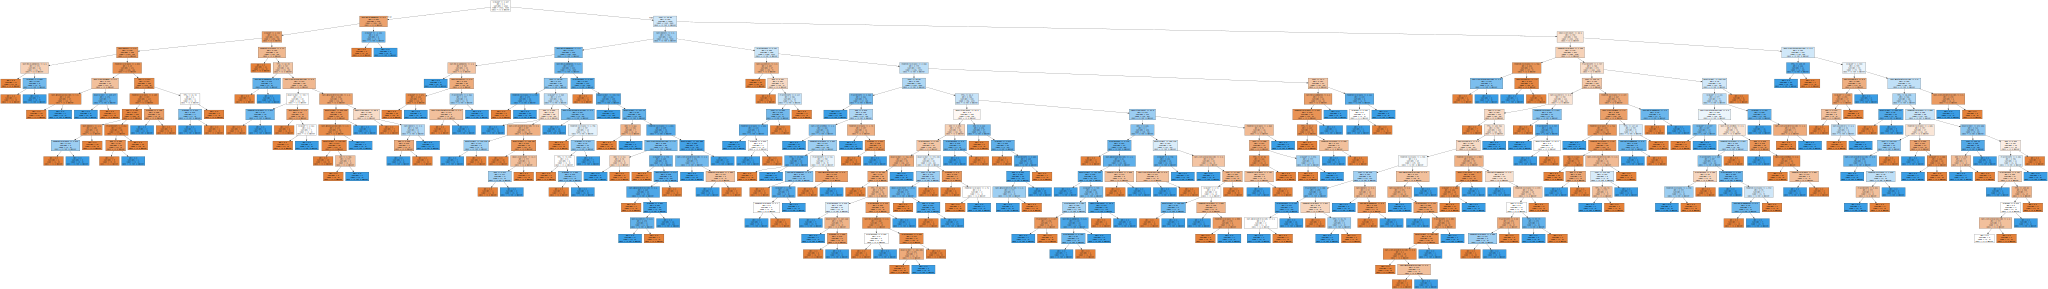

In [91]:
# to draw the tree
display(graphviz.Source(tree.export_graphviz(clf_dt, feature_names= list(X.columns), class_names= ["Is a Blocker", "Is not a Blocker"], filled=True)))

Note : 

Gini is a common measure of the impurity of a node and results in values inside the interval [0, 0.5]. When splitting, we choose to partition the data by the attribute that results in the smallest impurity of the new nodes.

Samples is the number of available elements in a particular node. The number of samples reduces as we go down the tree, and the tree successfully categorizes the animals.

Values represents the number of elements in the different categories in a node.

Note : 

Gini is a common measure of the impurity of a node and results in values inside the interval [0, 0.5]. When splitting, we choose to partition the data by the attribute that results in the smallest impurity of the new nodes.

Samples is the number of available elements in a particular node. The number of samples reduces as we go down the tree, and the tree successfully categorizes the animals.

Values represents the number of elements in the different categories in a node.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 6 : Confusion Matrix


The confusion matrix function evaluates classification accuracy by computing the number of observations actually in group i, but predicted to be in group j. 

/home/clara/Software/miniconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


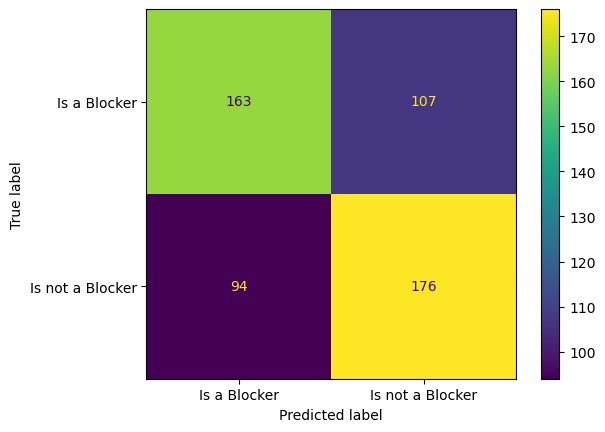

In [92]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Is a Blocker", "Is not a Blocker"])  

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 7 : Balance Accuracy 


This function computes the balance accuracy which avoids inflated performance estimated on imbalanced datasets. It is defined as the average of recall scores per class where each sample is weighted according to the inverse prevalence of it's true class. 
Indeed, the testing dataset is not balanced, as it has 1031 'Is a Blocker' exemples and 1017 'Is not a blocker' exemples. 

Note : The best value is 1 and the worst is 0 when adjusted = False. 

In [93]:
balanced_accuracy_score(y_test, y_pred, adjusted = False)      # to calculate balanced accuracy score

0.6277777777777778

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 8 : Matthews correlation coefficient (MCC)

This coefficient is used to measure the quality of the clasifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of different sizes. 

Note : A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction.

In [94]:
matthews_corrcoef(y_test, y_pred)                             # to calculate Matthews correlation coefficient

0.2558522916738256

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 9 : Post-Pruning Part I : to visualize alpha

The main idea behind pruning a Regression Tree is to prevent overfitting the Training Data in view to improve the fitting to the Testing Data. Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. 

The decision tree is very large and has an important depth which may suggests that the model overfitts. Therefore, it is necesarry to prune the branches of the decision tree using a Cost Complexity technique. Furthermore, ccp_alpha as the cost complexity parameter parameterizes this pruning technique and gives the minimum leaf value of decision tree and each ccp_alpha will create different classifier and choose the best out of it. Greater values of ccp_alpha results in more pruned nodes. 

Note : The maximum value for alpha given by ccp_alpha[:-1] will be omited because it would prune all leaves. 

First, we are going to extract the different values of alpha. 

In [95]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)               # to determine values for alpha 
ccp_alphas, impurities = path.ccp_alphas, path.impurities                  # to extract different values for alpha
ccp_alphas = ccp_alphas[:-1]                                               # to exclude the maximum value of alpha because it would prune all the tree leaving only the root


Note : The function cost_complexity_pruning_path of DecisionTree in sklearn gives the effective alphas of subtrees during pruning and also the corresponding impurities (Gini and Entropy).

Secondly, we are going to build a pruned decision tree for each value of alpha and store them in an array called clf_dts. 

In [96]:
clf_dts = []     # an array to contain all the decision trees 

# For each alpha we will append our model to a list : 
for ccp_alpha in ccp_alphas:                                                  
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)  # to assign every alpha to a specific decision tree 
    clf_dt.fit(X_train, y_train)                                          # to fit the decision trees to the training dataset 
    clf_dts.append(clf_dt)                                                # to add all the decision trees into the array

Note : The subtree with the largest cost complexity that is smaller than ``ccp_alpha`` will be chosen. By default, no pruning is performed. 

In [97]:
ccp_alphas # an array corresponding to the weak points with respect to the various nodes

array([0.        , 0.00026455, 0.0005291 , 0.00068027, 0.00068027,
       0.00069444, 0.00069444, 0.00070547, 0.00070547, 0.00070862,
       0.00071011, 0.0007215 , 0.0007326 , 0.00074074, 0.00074697,
       0.00075188, 0.00075758, 0.00075758, 0.0007619 , 0.00078431,
       0.0008658 , 0.00092593, 0.00095238, 0.00095238, 0.00101219,
       0.00101819, 0.0010582 , 0.0010582 , 0.0010582 , 0.0010582 ,
       0.0010582 , 0.0010582 , 0.00107601, 0.00108025, 0.00111111,
       0.00113379, 0.00113379, 0.00119048, 0.00119048, 0.00119048,
       0.00119048, 0.00120718, 0.00123035, 0.00124029, 0.00124717,
       0.00125541, 0.00126984, 0.00126984, 0.00126984, 0.00127273,
       0.0012963 , 0.00130719, 0.00132275, 0.00132275, 0.00132275,
       0.00132275, 0.00132275, 0.00132275, 0.00132275, 0.0013545 ,
       0.00136054, 0.00136054, 0.0013834 , 0.00138889, 0.00138889,
       0.00140802, 0.00141093, 0.00142022, 0.00142857, 0.00142857,
       0.001443  , 0.00145503, 0.00147392, 0.00147392, 0.00148

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 10 : Accuracy vs Alpha for training and testing sets

After appending the list for each alpha to our model, we will finally plot a graph showing the accuracy in function of the alpha. This allow us to determine the value of alpha for which we will get maximum testing accuracy.

When ccp_alpha is set to zero and keeping the other default parameters of class:DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 67% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalized better. 

In [98]:
train_acc = []         # an array containing the training balanced_accuracy_score of all the decision trees
test_acc = []          # an array containing the testing balanced_accuracy_score of all the decision trees

for c in clf_dts: 
    y_train_pred = c.predict(X_train)                                   # to predict the score of the training dataset 
    y_test_pred = c.predict(X_test)                                     # to predict the score of the testing dataset
    train_acc.append(balanced_accuracy_score(y_train_pred, y_train))    # to add training accuracy of all the decision trees into an array 
    test_acc.append(balanced_accuracy_score(y_test_pred, y_test))       # to add testing accuracy of all the decision trees into an array 



In [99]:
# to determine the alpha value corresponding to the maximum value of the testing dataset

diff_acc = [abs(i-j) for i, j in zip(test_acc,train_acc)]
index_test_acc = diff_acc.index(min(diff_acc))

for alpha in ccp_alphas : 
    if list(ccp_alphas).index(alpha) == index_test_acc :
        print(alpha)


0.0093333348266669


In [100]:
diff_acc = [abs(i-j) for i, j in zip(test_acc,train_acc)]     # second same way to calculate the optimal alpha value 
index_test_acc = diff_acc.index(min(diff_acc))
ccp_alphas[index_test_acc]

0.0093333348266669

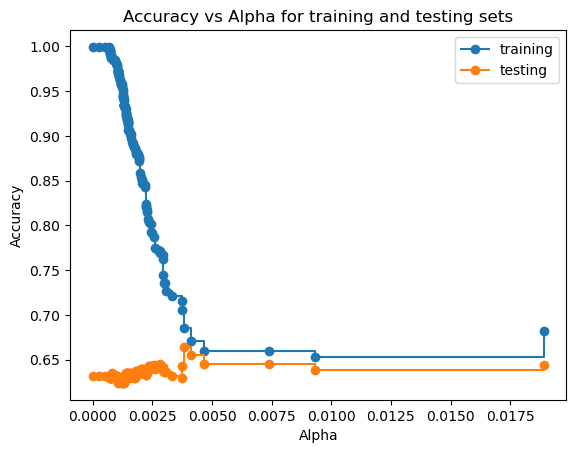

In [101]:
# to plot the graph 'Accuracy vs Alpha for training and testing sets'

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_acc, marker='o', label="training",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_acc, marker='o', label="testing",
        drawstyle="steps-post")
ax.legend()
plt.show()

In the graph above, we observe that the accuracy for the testing dataset hits its maximum value at 0.005372650310662266 for Training dataset (0.0093333348266669 -> Testing dataset). At this point, we have a low variance and bias. 

 -----------------------------------------------------------------------------------------------------------------

Step 11 : Build a pruned decision tree with ccp_alpha=0.005372650310662266.

Therefore, we are now able to construct a pruned decision tree based on the alpha value generating a more accurate model. 

In [125]:
clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0093333348266669)          # to build the pruned decision tree 
clf_dt.fit(X_train,y_train)                                                              # to fit the pruned decision tree to the training dataset
y_pred = clf_dt.predict(X_test)                                                          # to predict the response to the training dataset

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 12 : Visual Representation of the pruned decision tree

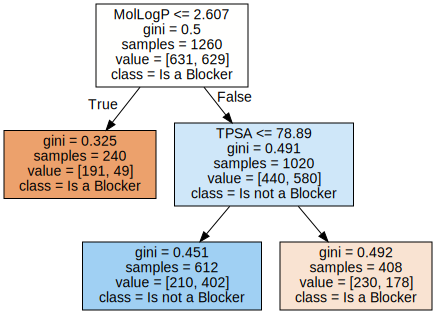

In [126]:
# to draw the pruned decision tree
display(graphviz.Source(tree.export_graphviz(clf_dt, feature_names= list(X.columns), class_names= ["Is a Blocker", "Is not a Blocker"], filled=True)))

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 13 : Calculation of the new metrics regarding the pruned decision tree

In [127]:
balanced_accuracy_score(y_test, y_pred, adjusted = False)      # to calculate balanced accuracy score of the pruned decision tree

0.6388888888888888

The difference of accuracy between the pruned decision tree of the Training data set and the preliminary tree is statistically not enough to be relevant.

In [105]:
matthews_corrcoef(y_test, y_pred)                               # to calculate Matthews correlation coefficient of the pruned decision tree

0.28927802918475176

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 14 : Confusion matrix of the pruned decision tree

/home/clara/Software/miniconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


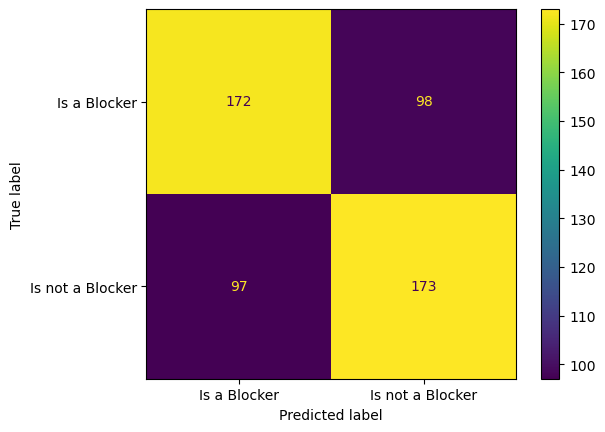

In [128]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Is a Blocker", "Is not a Blocker"])  

The model is now less overfitting and the performance on the testing dataset has a bit improved. However, those results are not sufficient and that is why we are going to realize a Cross Validation analysis. 

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 15 : Build a pruned decision tree with ccp_alpha=0.0022

In [107]:
clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0022)                         # to build the pruned decision tree 
clf_dt.fit(X_train,y_train)                                                              # to fit the pruned decision tree to the training dataset
y_pred = clf_dt.predict(X_test)                                                          # to predict the response to the training dataset

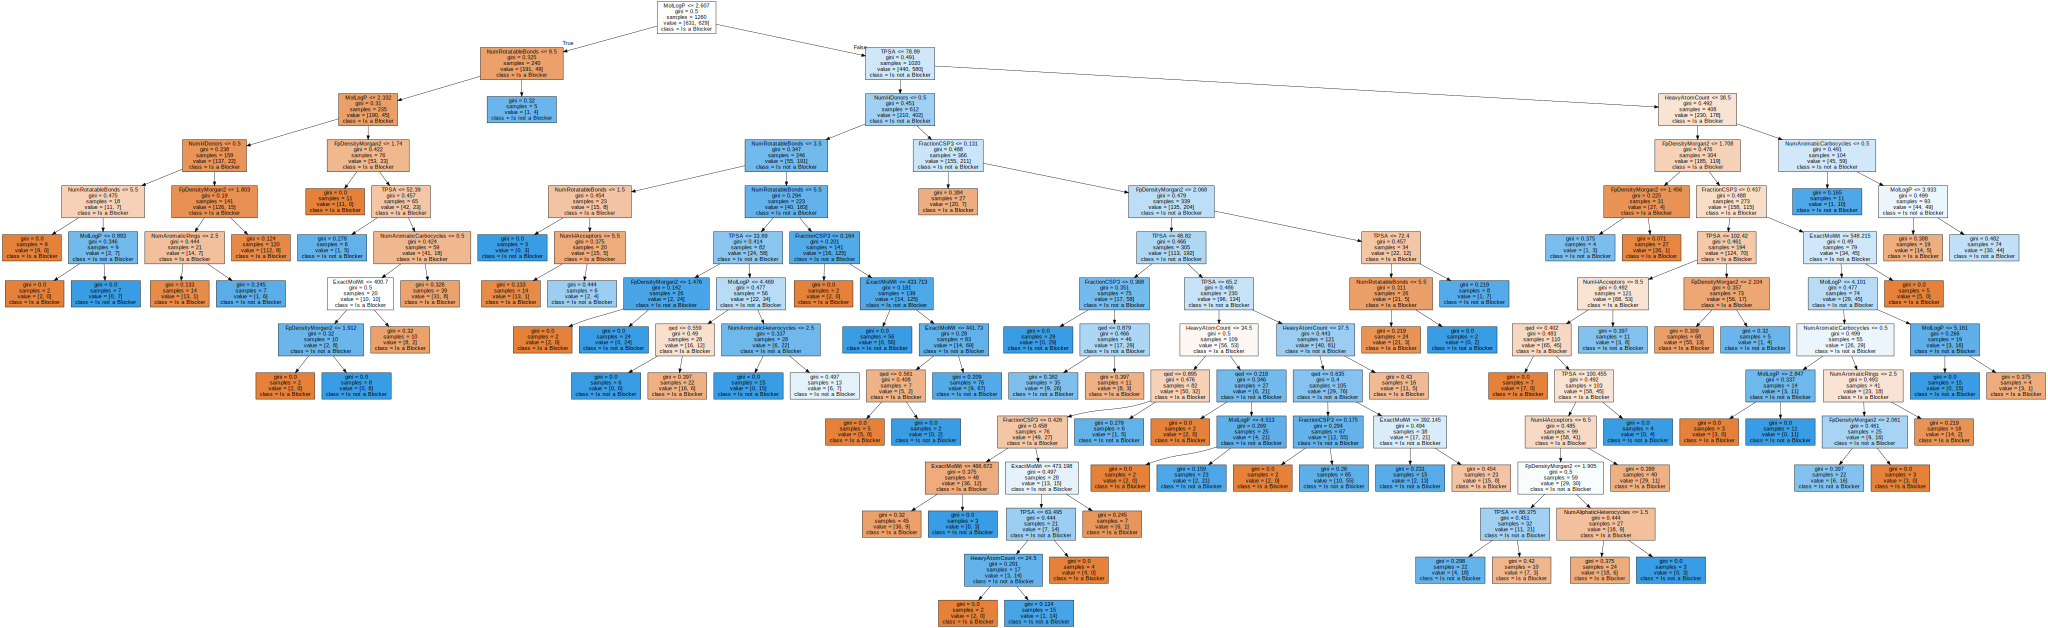

In [108]:
# to draw the pruned decision tree
display(graphviz.Source(tree.export_graphviz(clf_dt, feature_names= list(X.columns), class_names= ["Is a Blocker", "Is not a Blocker"], filled=True)))

In [109]:
balanced_accuracy_score(y_test, y_pred, adjusted = False)      # to calculate balanced accuracy score of the pruned decision tree

0.6388888888888888

In [110]:
matthews_corrcoef(y_test, y_pred)                               # to calculate Matthews correlation coefficient of the pruned decision tree

0.2782074420373286

/home/clara/Software/miniconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


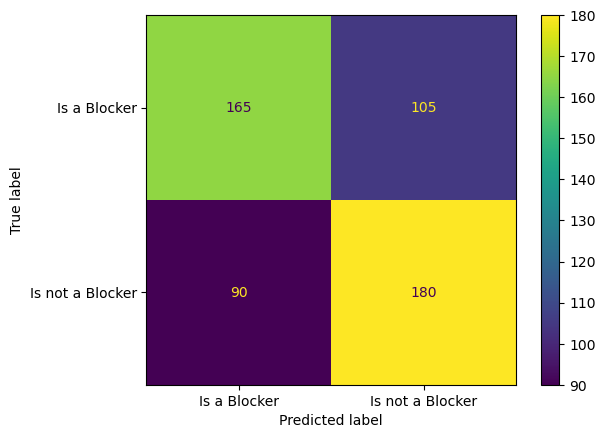

In [111]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Is a Blocker", "Is not a Blocker"]) 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Step 15 : Post-Pruning Part II : Cross Validation for finding the best alpha

The above pruned decision tree suggested one value for alpha, 0.00042234636871508384, but another set of data might suggest another optimal value. 

First, let's demonstrate that different testing and training datasets result in trees with different accuracies when we set ccp_alpha = 0.00042234636871508384. This analysis will be performed using the cross_val_score() function to generate differnt testing and trainig datasets and then train and test the tree with those datasets. 

<AxesSubplot:xlabel='tree'>

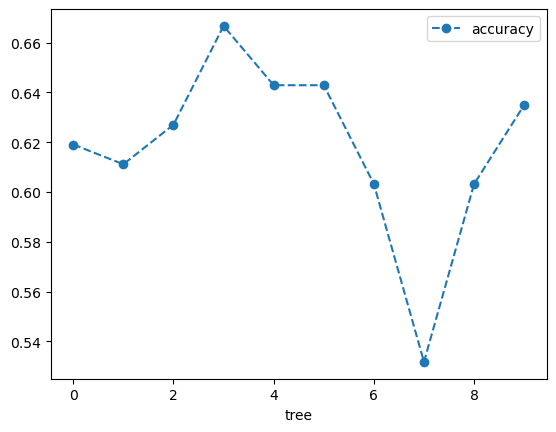

In [112]:
clf_dt = DecisionTreeClassifier(random_state=50, ccp_alpha=0.005372650310662266)    # to create the decision tree with ccp_alpha = 0.00042234636871508384

scores = cross_val_score(clf_dt, X_train, y_train, cv=10)                           # 10-fold cross validation to obtain a 10 different training and testing datasets that are then used to train and test the tree.
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

This graph shows that using different testing and training dataset with the same alpha resulted in differented accuracies, suggesting that alpha is sensitive to the datasets. In view of those results, we are going to use cross validation to find the optimal value for ccp_alpha. 

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [113]:
alpha_loop = []  # an array to store the results of each fold during cross validation 

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=50, ccp_alpha=ccp_alpha)          # to run a 10-fold cross validation for each candidate value for alpha
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop.append([ccp_alpha, np.mean(scores), np.std(scores)])                # to store the mean and standard deviation of the scores (accuracy) for each call

<AxesSubplot:xlabel='alpha'>

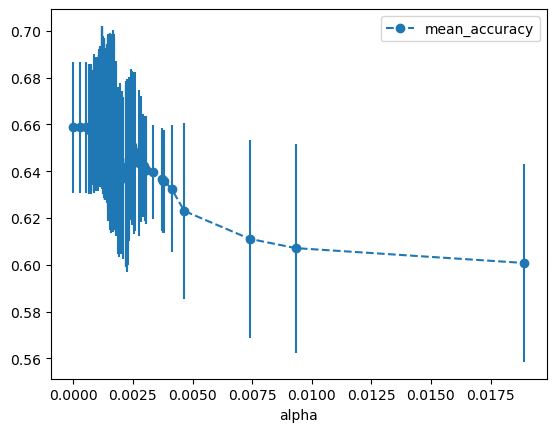

In [114]:
# to draw a graph of the means and standard deviation of the scores

alpha_results = pd.DataFrame(alpha_loop, columns= ['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

We can find the exact optimal value with :

In [130]:
alpha_results[(alpha_results['alpha']> 0.001300) & (alpha_results['alpha']< 0.001323	)]

,alpha,mean_accuracy,std
51,0.001307,0.661111,0.032346
52,0.001323,0.658730,0.030942
53,0.001323,0.658730,0.030942
54,0.001323,0.658730,0.030942
55,0.001323,0.658730,0.030942
56,0.001323,0.658730,0.030942
57,0.001323,0.658730,0.030942
58,0.001323,0.658730,0.030942


Training : One value of alpha at 0.001383 allows to obtain the best mean_accuracy at 0.669784. 

Testing : One value of alpha at 0.001323 allows to obtain the best mean_accuracy at 0.658730. 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Using the optimal value obtained with cross validation, we can now build the final classification tree. 

In [116]:
clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.001323)                         # to build the final pruned decision tree with the optimal value of alpha 
clf_dt.fit(X_train,y_train)                                                                 # to fit the pruned decision tree to the training dataset
y_pred = clf_dt.predict(X_test)                                                             # to predict the response to the training dataset

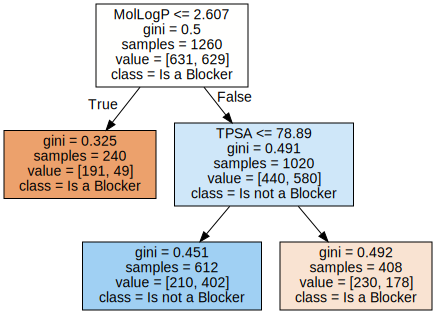

In [134]:
# to draw the final pruned decision tree
display(graphviz.Source(tree.export_graphviz(clf_dt, feature_names= list(X.columns), class_names= ["Is a Blocker", "Is not a Blocker"], filled=True)))

Interpretation

Training : First, we observe that 1774 molecules are a blocker and 1742 molecules are not a blocker. Furthermore, the major molecule of the dataset are not a blocker. The orange nodes have a mojority of 'Is a Blocker' and the blue node 'Is not a Blocker'. Besides, the darker the color is, the lower is the gini impurity, and so the better is the split. 

In [131]:
balanced_accuracy_score(y_test, y_pred, adjusted = False)      # to calculate balanced accuracy score of the final decision tree

0.6388888888888888

In [132]:
matthews_corrcoef(y_test, y_pred)                               # to calculate Matthews correlation coefficient of the final decision tree

0.27777968299475725

/home/clara/Software/miniconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


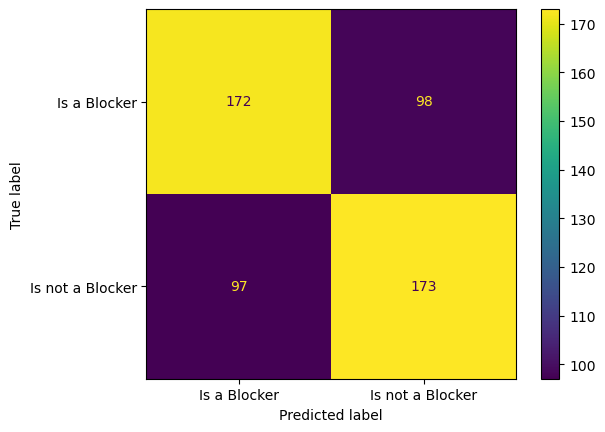

In [133]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Is a Blocker", "Is not a Blocker"]) 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

The final pruned tree is better at classifying than the full sized tree. 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------